In [1]:
import pandas as pd
import statsmodels.formula.api as sm
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [2]:
data = pd.read_csv('../datasets/data.csv', encoding='CP949')
target = pd.read_csv('../datasets/OECD신용등급.csv', encoding='CP949')


In [3]:
datasets = pd.merge(data, target, on=('국가별', '시점'), how='left')
datasets.columns = ['국가별', '시점', '국내총생산', '고용률', '국민부담률', '경제활동참가율', '무역의존도_수출',
       '무역의존도_수입', '수출', '수입', '외환보유액', '부채비율', '실업률', '평균근로자세금', '디플레이터',
       'GDP_성장률', '신용등급']
datasets.dropna(inplace=True)
datasets.reset_index(inplace=True)
datasets.drop(['국가별', 'index'], axis=1, inplace=True)
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시점        116 non-null    int64  
 1   국내총생산     116 non-null    int64  
 2   고용률       116 non-null    float64
 3   국민부담률     116 non-null    float64
 4   경제활동참가율   116 non-null    float64
 5   무역의존도_수출  116 non-null    float64
 6   무역의존도_수입  116 non-null    float64
 7   수출        116 non-null    float64
 8   수입        116 non-null    float64
 9   외환보유액     116 non-null    float64
 10  부채비율      116 non-null    float64
 11  실업률       116 non-null    float64
 12  평균근로자세금   116 non-null    float64
 13  디플레이터     116 non-null    float64
 14  GDP_성장률   116 non-null    float64
 15  신용등급      116 non-null    float64
dtypes: float64(14), int64(2)
memory usage: 14.6 KB


In [4]:
lb = LabelEncoder()
datasets['시점'] = lb.fit_transform(datasets['시점'])
datasets.describe()

,시점,국내총생산,고용률,국민부담률,경제활동참가율,무역의존도_수출,무역의존도_수입,수출,수입,외환보유액,부채비율,실업률,평균근로자세금,디플레이터,GDP_성장률,신용등급
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,1.160000e+02,1.160000e+02,1.160000e+02,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,1.689655,33346.146552,65.972414,34.313793,60.153448,37.006552,37.020345,2.217822e+05,2.229416e+05,8.167653e+04,73.539026,8.257759,38.507759,95.595690,3.329310,16.979940
std,1.058414,20702.131682,7.047338,6.950307,5.940245,22.166097,21.632006,2.805340e+05,3.268235e+05,1.823440e+05,41.213343,4.170646,8.705592,13.460676,3.148085,3.344374
min,0.000000,4076.000000,46.300000,11.400000,48.100000,7.440000,2.240000,3.092000e+03,3.919000e+03,2.790000e+02,6.788000,2.600000,14.700000,58.200000,-5.500000,3.900000
25%,1.000000,16641.000000,60.650000,30.500000,57.025000,20.292500,22.902500,4.842350e+04,4.620275e+04,9.268750e+03,45.829500,5.100000,32.825000,87.700000,1.800000,14.500000
50%,2.000000,30719.000000,66.100000,33.100000,59.650000,31.785000,29.410000,1.204630e+05,8.910150e+04,3.073500e+04,63.252000,7.450000,38.800000,100.000000,2.950000,18.000000
75%,3.000000,44260.500000,71.575000,39.250000,63.125000,51.107500,50.787500,3.073575e+05,3.133178e+05,7.170775e+04,101.067500,9.925000,43.775000,103.700000,4.200000,20.000000
max,3.000000,104965.000000,83.800000,48.000000,81.400000,146.180000,137.700000,1.503400e+06,2.248800e+06,1.233153e+06,234.073000,24.900000,57.100000,143.100000,25.200000,20.000000


In [5]:
ols_ = sm.ols('신용등급 ~ 시점 + 국내총생산 + 고용률 + 국민부담률 + 경제활동참가율 +  무역의존도_수출 + 무역의존도_수입 + 수출 + 수입 + 외환보유액 + 부채비율 + 실업률 + 평균근로자세금 + 디플레이터 + GDP_성장률',
 data=datasets)
result = ols_.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                   신용등급   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     24.00
Date:                Thu, 12 May 2022   Prob (F-statistic):           1.44e-26
Time:                        15:00:37   Log-Likelihood:                -215.62
No. Observations:                 116   AIC:                             463.2
Df Residuals:                     100   BIC:                             507.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9218      3.503      0.263      0.7

In [6]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(ols_.exog, i)} 
             for i, column in enumerate(ols_.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,시점,3.638154
1,국내총생산,2.177886
2,고용률,9.753008
3,국민부담률,4.428681
4,경제활동참가율,7.173076
5,무역의존도_수출,10.915512
6,무역의존도_수입,13.044919
7,수출,15.752646
8,수입,13.465293
9,외환보유액,2.212181


d:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


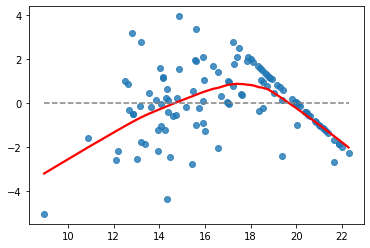

d:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


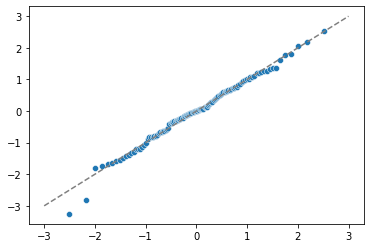

d:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


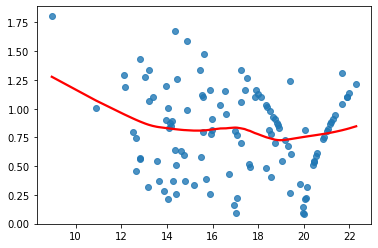

In [7]:
fitted = result.predict(datasets)
residual = datasets['신용등급'] - fitted

sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')
plt.show()

sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')
plt.show()

sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.show()

## 출처 : https://ysyblog.tistory.com/120